In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import seaborn as sns
from scipy import stats
from pprint import pprint

In [67]:
iris = load_iris()

In [68]:
datasest = iris['data']

In [69]:
target = iris['target']

In [70]:
iris_data = pd.DataFrame(np.c_[dataset, target], columns=iris['feature_names'] + ['species'])

In [71]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 1. Measures of the central trend

In [213]:
describe = iris_data.describe().T
describe['range'] = describe['max'] - describe['min']
describe['D'] = iris_data.var()
describe.drop(columns=['count', 'std', '25%', '50%', '75%'], inplace=True)
describe = describe.reindex(['mean', 'D', 'min', 'max', 'range'], axis=1)
describe

,mean,D,min,max,range
sepal length (cm),5.843333,0.685694,4.3,7.9,3.6
sepal width (cm),3.057333,0.189979,2.0,4.4,2.4
petal length (cm),3.758000,3.116278,1.0,6.9,5.9
petal width (cm),1.199333,0.581006,0.1,2.5,2.4
species,1.000000,0.671141,0.0,2.0,2.0


### 2. Distribution of features

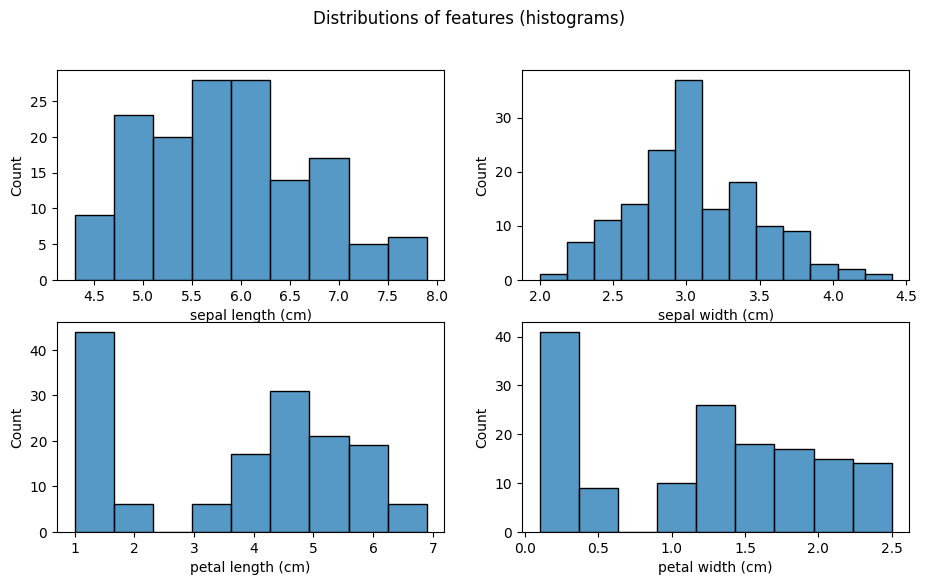

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Distributions of features (histograms)')

sns.histplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)')
sns.histplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)')
sns.histplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)')
sns.histplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)')
plt.show()

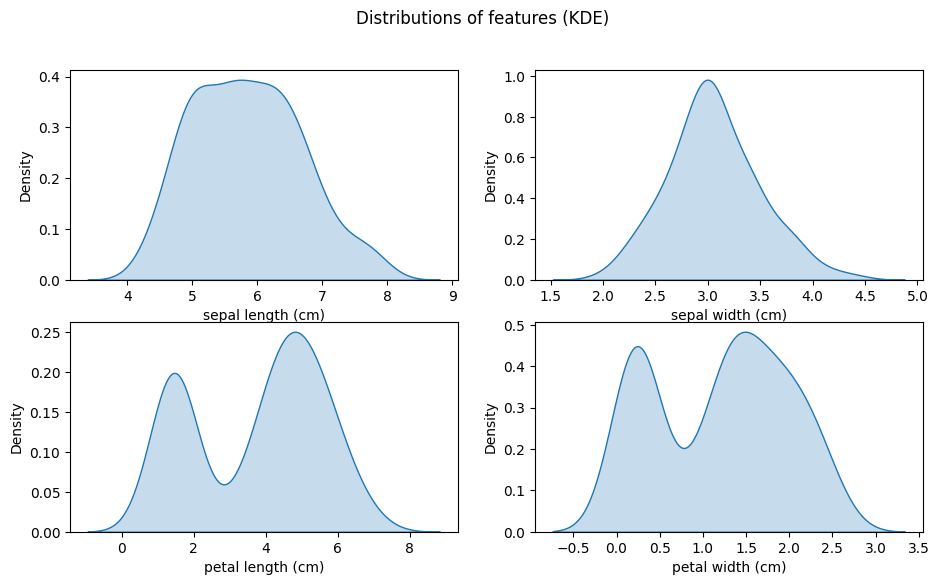

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Distributions of features (KDE)')

sns.kdeplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)', fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)', fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)', fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)', fill=True)
plt.show()

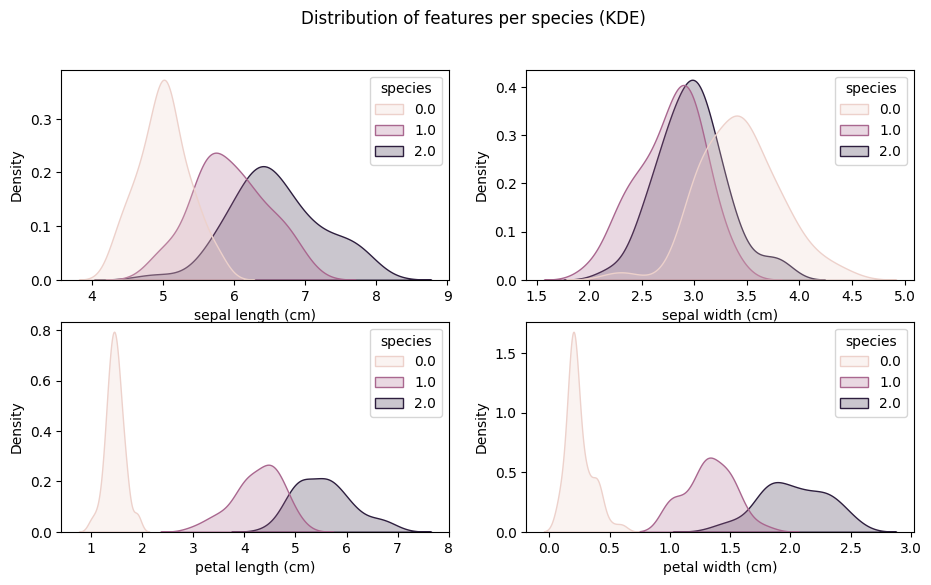

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Distribution of features per species (KDE)')

sns.kdeplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)', hue='species', fill=True)
plt.show()

### 3. Correlation

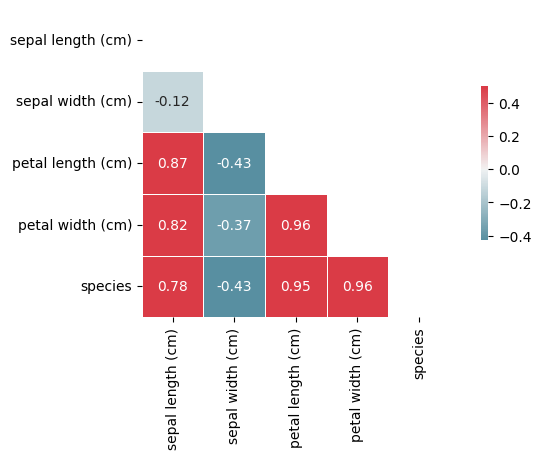

In [118]:
corr = iris_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5},
            cbar=True, fmt='.2f', annot_kws={'size': 10}, annot=True)
plt.show()

### 4. Checking for normality (features 1 & 2)

In [122]:
list(iris_data.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

#### 1) sepal length (cm)

In [155]:
stat, p = stats.shapiro(iris_data['sepal length (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9761; Pvalue: 0.0102


In [156]:
alpha = 0.05

In [157]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


#### 2) sepal width (cm)

In [159]:
stat, p = stats.shapiro(iris_data['sepal width (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9849; Pvalue: 0.1011


In [160]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


### 5. Target statistics

In [309]:
gr_sp = iris_data.groupby('species')

sp_dict = {
    'Class_0': {},
    'Class_1': {},
    'Class_2': {}
}

result = {}

for col in list(iris_data.columns)[:-1]:
    statistics = [gr_sp[col].mean(),
                  gr_sp[col].var(),
                  gr_sp[col].min(),
                  gr_sp[col].max(),
                  gr_sp[col].max() - gr_sp[col].min()]
    
    for i in range(len(gr_sp)):
        sp_dict[f'Class_{i}'][col] = []
        for stat in statistics:
            sp_dict[f'Class_{i}'][col].append(stat[i])

# pprint(sp_dict)

for data in sp_dict:
    result[data] = pd.DataFrame(sp_dict[data], columns=list(iris_data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])

species
0.0    50
1.0    50
2.0    50
Name: sepal width (cm), dtype: int64

In [280]:
print('<<< Class_0 >>>')
result['Class_0'].T

<<< Class_0 >>>


,mean,D,min,max,range
sepal length (cm),5.006,0.124249,4.3,5.8,1.5
sepal width (cm),3.428,0.143690,2.3,4.4,2.1
petal length (cm),1.462,0.030159,1.0,1.9,0.9
petal width (cm),0.246,0.011106,0.1,0.6,0.5


In [281]:
print('<<< Class_1 >>>')
result['Class_1'].T

<<< Class_1 >>>


,mean,D,min,max,range
sepal length (cm),5.936,0.266433,4.9,7.0,2.1
sepal width (cm),2.770,0.098469,2.0,3.4,1.4
petal length (cm),4.260,0.220816,3.0,5.1,2.1
petal width (cm),1.326,0.039106,1.0,1.8,0.8


In [282]:
print('<<< Class_2 >>>')
result['Class_2'].T

<<< Class_2 >>>


,mean,D,min,max,range
sepal length (cm),6.588,0.404343,4.9,7.9,3.0
sepal width (cm),2.974,0.104004,2.2,3.8,1.6
petal length (cm),5.552,0.304588,4.5,6.9,2.4
petal width (cm),2.026,0.075433,1.4,2.5,1.1


### 6. Automatization EDA

In [304]:
def auto_eda(data):
    # Show 5 first strings
    print(data.head())
    
    # Show statistics (mean, D, min, max, range)
    describe = data.describe().T
    describe['range'] = describe['max'] - describe['min']
    describe['D'] = data.var()
    describe.drop(columns=['count', 'std', '25%', '50%', '75%'], inplace=True)
    describe = describe.reindex(['mean', 'D', 'min', 'max', 'range'], axis=1)
    print(describe)
    
    # Distribution of features
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distributions of features (histograms)')

    sns.histplot(ax=axs[0, 0], data=data, x='sepal length (cm)')
    sns.histplot(ax=axs[0, 1], data=data, x='sepal width (cm)')
    sns.histplot(ax=axs[1, 0], data=data, x='petal length (cm)')
    sns.histplot(ax=axs[1, 1], data=data, x='petal width (cm)')
    plt.show()
    
    # Distributions of features (KDE)
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distributions of features (KDE)')

    sns.kdeplot(ax=axs[0, 0], data=data, x='sepal length (cm)', fill=True)
    sns.kdeplot(ax=axs[0, 1], data=data, x='sepal width (cm)', fill=True)
    sns.kdeplot(ax=axs[1, 0], data=data, x='petal length (cm)', fill=True)
    sns.kdeplot(ax=axs[1, 1], data=data, x='petal width (cm)', fill=True)
    plt.show()
    
    # Distribution of features per species (KDE)
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distribution of features per species (KDE)')

    sns.kdeplot(ax=axs[0, 0], data=data, x='sepal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[0, 1], data=data, x='sepal width (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 0], data=data, x='petal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 1], data=data, x='petal width (cm)', hue='species', fill=True)
    plt.show()
    
    # Correlation
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 4))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5},
                cbar=True, fmt='.2f', annot_kws={'size': 10}, annot=True)
    plt.show()
    
    # Checking for normality (features 1 & 2)
    ## 1) sepal length (cm)
    stat, p = stats.shapiro(data['sepal length (cm)'])
    print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    ## 2) sepal width (cm)
    stat, p = stats.shapiro(data['sepal width (cm)'])
    print(f'\nStatistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
    
    # Target statistics
    gr_sp = data.groupby('species')

    sp_dict = {
        'Class_0': {},
        'Class_1': {},
        'Class_2': {}
    }

    result = {}

    for col in list(data.columns)[:-1]:
        statistics = [gr_sp[col].mean(),
                      gr_sp[col].var(),
                      gr_sp[col].min(),
                      gr_sp[col].max(),
                      gr_sp[col].max() - gr_sp[col].min()]

        for i in range(len(gr_sp)):
            sp_dict[f'Class_{i}'][col] = []
            for stat in statistics:
                sp_dict[f'Class_{i}'][col].append(stat[i])

    for sdata in sp_dict:
        result[sdata] = pd.DataFrame(sp_dict[sdata], columns=list(data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])
    
    ## Class_0
    print('\n<<< Class_0 >>>')
    print(result['Class_0'].T, '\n')
    
    ## Class_1
    print('<<< Class_1 >>>')
    print(result['Class_1'].T, '\n')
    
    ## Class_2
    print('<<< Class_2 >>>')
    print(result['Class_2'].T, '\n')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
                       mean         D  min  max  range
sepal length (cm)  5.843333  0.685694  4.3  7.9    3.6
sepal width (cm)   3.057333  0.189979  2.0  4.4    2.4
petal length (cm)  3.758000  3.116278  1.0  6.9    5.9
petal width (cm)   1.199333  0.581006  0.1  2.5    2.4
species            1.000000  0.671141  0.0  2.0    2.0


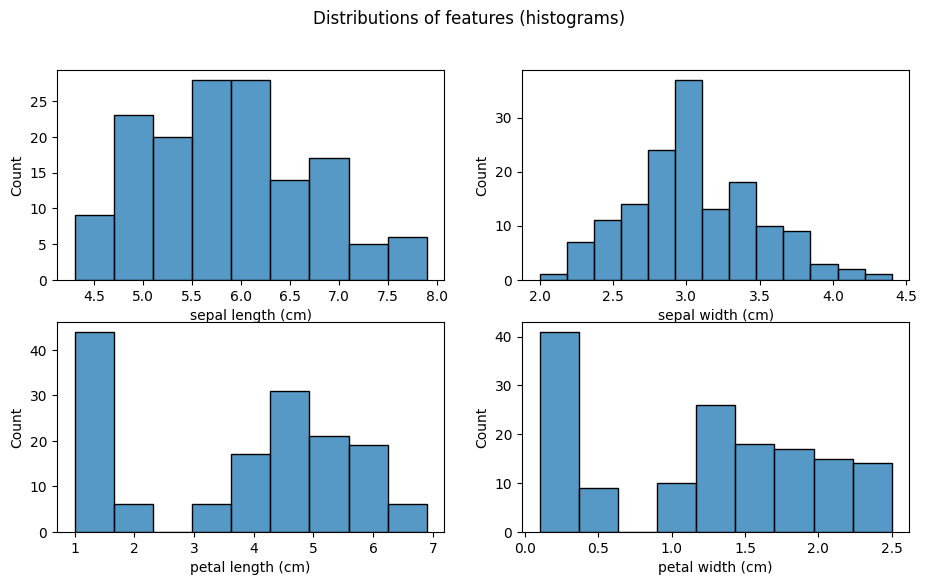

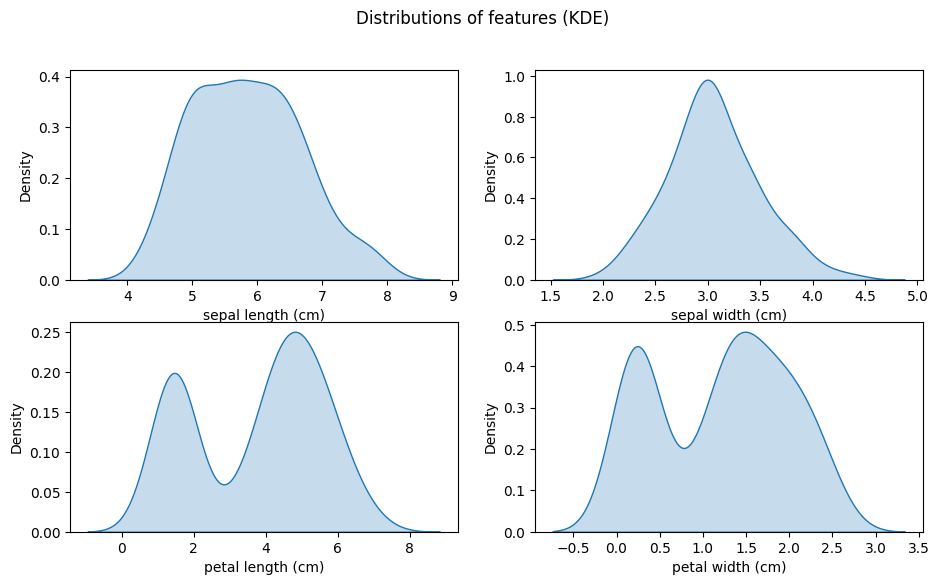

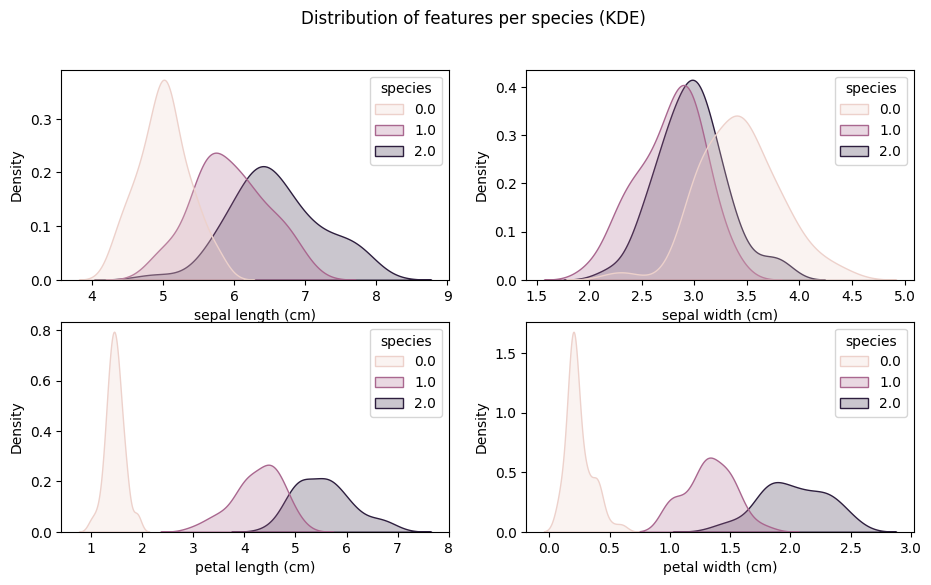

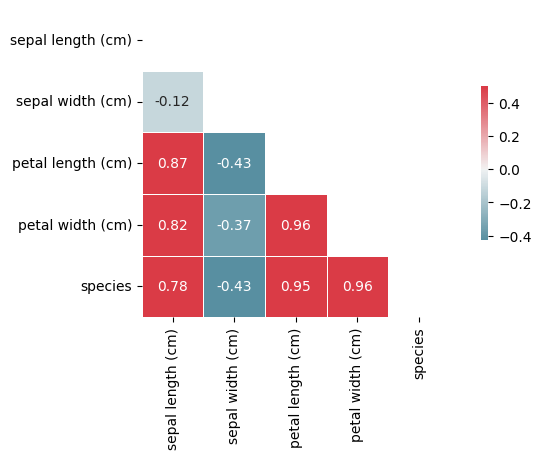

Statistic: 0.9761; Pvalue: 0.0102
Sample does not look Gaussian (reject H0)

Statistic: 0.9849; Pvalue: 0.1011
Sample looks Gaussian (fail to reject H0)

<<< Class_0 >>>
                    mean         D  min  max  range
sepal length (cm)  5.006  0.124249  4.3  5.8    1.5
sepal width (cm)   3.428  0.143690  2.3  4.4    2.1
petal length (cm)  1.462  0.030159  1.0  1.9    0.9
petal width (cm)   0.246  0.011106  0.1  0.6    0.5 

<<< Class_1 >>>
                    mean         D  min  max  range
sepal length (cm)  5.936  0.266433  4.9  7.0    2.1
sepal width (cm)   2.770  0.098469  2.0  3.4    1.4
petal length (cm)  4.260  0.220816  3.0  5.1    2.1
petal width (cm)   1.326  0.039106  1.0  1.8    0.8 

<<< Class_2 >>>
                    mean         D  min  max  range
sepal length (cm)  6.588  0.404343  4.9  7.9    3.0
sepal width (cm)   2.974  0.104004  2.2  3.8    1.6
petal length (cm)  5.552  0.304588  4.5  6.9    2.4
petal width (cm)   2.026  0.075433  1.4  2.5    1.1 



In [305]:
auto_eda(iris_data)

In [306]:
describe

,mean,D,min,max,range
sepal length (cm),5.843333,0.685694,4.3,7.9,3.6
sepal width (cm),3.057333,0.189979,2.0,4.4,2.4
petal length (cm),3.758000,3.116278,1.0,6.9,5.9
petal width (cm),1.199333,0.581006,0.1,2.5,2.4
species,1.000000,0.671141,0.0,2.0,2.0


### 7. Conclusion

In [310]:
describe

,mean,D,min,max,range
sepal length (cm),5.843333,0.685694,4.3,7.9,3.6
sepal width (cm),3.057333,0.189979,2.0,4.4,2.4
petal length (cm),3.758000,3.116278,1.0,6.9,5.9
petal width (cm),1.199333,0.581006,0.1,2.5,2.4
species,1.000000,0.671141,0.0,2.0,2.0


1) sepal_length: Хорошая дисперсия, минимальные и максимальные значения в допустимых пределах
   sepal_width: Минимальная дисперсия (разброс значений незначительный)
   petal_length: Высока дисперсия (показатель определенных аномалий в выборке), размах больше среднего
   petal_width: Максимальное значение сильно удалено от среднего, размах больше среднего

2) 1 признак: Умеренно скошенное, унимодальное распределение.
   2 признак: Симметричное, унимодальное распределение.
   3 признак: Скошенное, бимодальное распределение.
   4 признак: Скошенное, бимодальное распределение.
   
   Такие отличия объясняются тем, что классы из которых состоит выборка сильно отличаются по размерам данных признаков. Как     результат, происходит перевес на определенных признаках. Стоит отметить, что количество каждого класса одинаково.

3). Наблюдается сильная прямая взаимосвязь между: S & PW (0.96), S & PL (0.95), S & SL (0.78), PL & PW (0.96), SL & PW (0.82), SL & PL (0.87). Тесная линейная положительная связь.

4). Тест Шапиро-Вилка <br><br>
    -1. Указывает на то, что мы отвергаем нулевую гипотезу. Не Гауссово распределение <br>
    -2. Не отвергаем. Гауссово распределение

5) Если сравнить статистики признаков между классами и анализировать график "Distribution of features per species (KDE)":<br><br>
   Class_0 в целом достаточно консервативен к разбросам, и его размеры по SL, PL, PW находятся в узком диапазоне.
   Этот класс самый маленький вид. Единственное его отличие в том, что SW имеет самое большое значение.<br><br>
   Class_1 Имеет средние значения, размах по всем признакам меньше среднего.<br><br>
   Class_2, очевидно, самый крупный представитель. Имеет более широкие границы в размерах. Хотя по признакам SL, PW, PL имеет самую низкую ядерную плотность.
   